#  THE Spark Foundation-GRIP - Data Science and Business Analytics - August'2021

## Task 1 : Prediction Using Supervised ML

### Author : Ranjan Sethi

#### Dataset Used : It can be downloaded through the following link -: http://bit.ly/w-data

#### Predict the percentage of student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

In [35]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
df=pd.read_csv("dataset.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

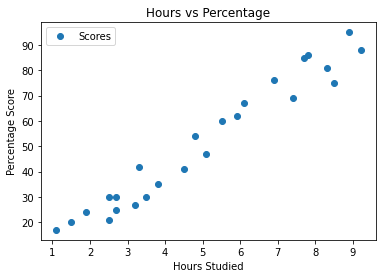

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [7]:
#correlation is useful for getting the relationship between the attributes.
#by default it will give the correlation by pearson method
df.corr()
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


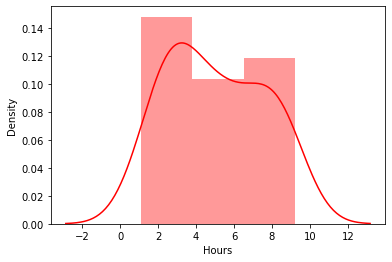

In [11]:
sb.distplot(df['Hours'],color='red');

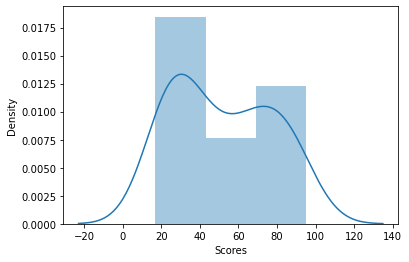

In [12]:
sb.distplot(df['Scores']);

In [15]:
#Splitting the dataset into independent and dependent variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
#Training the linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [18]:
algo=LinearRegression()

In [19]:
algo.fit(X_train,y_train)

LinearRegression()

In [20]:
#predicting the results
y_pred=regressor.predict(X_test)

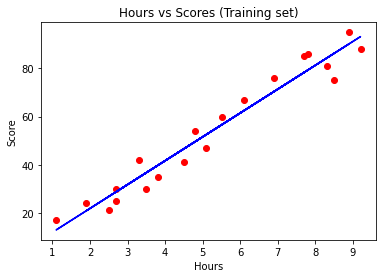

In [24]:
#visualising the training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

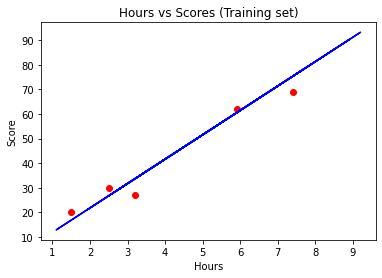

In [25]:
#visualising the training set result
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [26]:
pred=algo.predict(X_test)
pd.DataFrame({'Actual_Value':y_test,'PREDICTED_VALUE':pred})

,Actual_Value,PREDICTED_VALUE
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [28]:
#Predicting the result
prediction=regressor.predict([[9.5]])
prediction

array([96.16939661])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

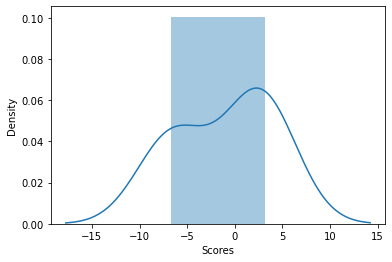

In [30]:
sb.distplot(y_test-pred)

In [31]:
h=9.25
a=algo.predict([[h]])
print('if student studies for {} hours per day he/she is likely to score {}%'.format(h,*a))

if student studies for 9.25 hours per day he/she is likely to score 93.69173248737538%


In [33]:
#Checking the r2 score and mean absolute error
from sklearn import metrics
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


In [34]:
#Checking the accuracy  of model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356